Utils 


In [3]:
def load (path) : 
  df = pd.read_csv(path)
  return df

In [4]:
def nan_viz (data) : 
  import matplotlib.pyplot as plt
  import seaborn as sns

  total = data.isnull().sum().sort_values(ascending=False)


  percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)

  missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
  f, ax = plt.subplots(figsize=(15, 6))
  plt.xticks(rotation='90')
  sns.barplot(x=missing_data.index, y=missing_data['Percent'])
  plt.xlabel('Features', fontsize=15)
  plt.ylabel('Percent of Missing Values', fontsize=15)
  plt.title('Percentage of Missing Data by Feature', fontsize=15)
  missing_data.head()

In [84]:

def random_sampling(df, variable): 
    
    # extract the random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0,replace=True)
    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable] = random_sample
    return(df)

In [37]:
def prepare_compteur (cons,i) : 
  df = pd.DataFrame(cons.iloc[i][1:])
  df.reset_index(level=0, inplace=True)
  df.columns = ['Datetime','consommation']
  # df = df.set_index('Datetime')
  return (df)

In [71]:
def feature_weekend(row): 

    if row["day"] == 5 or row["day"] == 6 or row["day"] == 7:
        return "Weekend"
    else :
      return "NonWeekend"

In [77]:
  import copy
  from tqdm import tqdm
  def time_features (df) : 
    df_copy = df.copy()
    df= df.set_index('Datetime')
    df1 = pd.DataFrame([], columns=["year","month", "day", "hour","minute"])
    from datetime import datetime
    for i in tqdm(range(len(df.index))):
        date = datetime.strptime(df.index[i] , '%Y-%m-%d %H:%M:%S' )
        df_tmp = pd.DataFrame([(date.year,date.month ,date.day, date.hour , date.minute)], columns=["year","month", "day", "hour","minute"])
        df1 = df1.append(df_tmp)
    df1 = df1.reset_index()
    df1.drop('index',axis=1,inplace=True)
    df_train = pd.concat([df_copy,df1],axis= 1,ignore_index=True )
    df_copy = df_train
    df_copy.columns = ["Datetime" ,"consommation" ,"year","month", "day", "hour","minute"]
    df_copy['season'] = df_copy['month'].apply(lambda month_number: (month_number%12 + 3)//3)
    df_copy['dayofyear'] = [pd.to_datetime(df.index[i]).timetuple().tm_yday for i in range(len(df_copy)) ]
    df_copy['day_string'] = [pd.to_datetime(df_copy['Datetime'][i]).strftime("%A") for i in range(len(df_copy)) ]
    df_copy['week_of_year'] =  pd.to_datetime(df_copy['Datetime']).dt.weekofyear
    df_copy["weekend"] = [ feature_weekend(df_copy.iloc[i]) for i in range(len(df_copy)) ]
    return(df_copy)

In [60]:
def casting(df) : # casting
  df['hour'] = df['hour'].astype('int64')
  df['month'] = df['month'].astype('int64')
  df['consommation'] = df['consommation'].astype('float')

In [63]:
 def mapping (df) : # mapping
    df['weekend'] = df['weekend'].map({'NonWeekend':0, 'Weekend':1})
   

In [64]:
def encoding (df) : # encodage
  from sklearn import preprocessing
  le = preprocessing.LabelEncoder()
  df['day_string'] = le.fit_transform(df['day_string'])


In [40]:
# plotting
import plotly.express as px
def plot_time_serie (df) : 
  fig = px.line(df,
                x='Datetime',
                y='consommation',
                title=f'consommation en fonction du temps')
  fig.show()

In [95]:
def aggregated_plot(df,agg1,agg2,attribute,title) : 
  _ = df\
    .groupby([agg1, agg2], as_index=False)\
    .agg({'consommation':attribute})
  
  fig = px.line(_,
              x=agg1, 
              y='consommation', 
              color=agg2, 
              title=title)
  fig.show()

In [112]:
  def weather_avg_feat(weather_avg,df) :
    temp = weather_avg[weather_avg['meter_id']== cons.iloc[3001]['meter_id']].transpose()[1:]
    temp.columns=['weather']
    L =[]
    for x in temp['weather'] :
      for i in range(48) :
        L.append(x)
    df['weather_avg'] = L

In [119]:
  def weather_min_feat(weather_avg,df) :
    temp = weather_min[weather_min['meter_id']== cons.iloc[3001]['meter_id']].transpose()[1:]
    temp.columns=['weather']
    L =[]
    for x in temp['weather'] :
      for i in range(48) :
        L.append(x)
    df['weather_min'] = L


In [120]:
  def weather_max_feat(weather_avg,df) :
    temp = weather_max[weather_avg['meter_id']== cons.iloc[3001]['meter_id']].transpose()[1:]
    temp.columns=['weather']
    L =[]
    for x in temp['weather'] :
      for i in range(48) :
        L.append(x)
    df['weather_max'] = L

In [129]:
import matplotlib.pyplot as plt
def Elbow_curve(df) : 
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()
  weather_scaled = scaler.fit_transform(df[['weather_min','weather_avg','weather_max','season']])
  # optimum K
  from sklearn.cluster import KMeans

  Nc = range(1, 20)
  kmeans = [KMeans(n_clusters=i) for i in Nc]
  kmeans

  score = [kmeans[i].fit(weather_scaled).score(weather_scaled) for i in range(len(kmeans))]
  score
  plt.plot(Nc,score)
  plt.xlabel('Number of Clusters')
  plt.ylabel('Score')
  plt.title('Elbow Curve')
  plt.show()

Main

Loading

In [110]:
import pandas as pd
cons = load('/content/gdrive/MyDrive/consumption.csv')
weather_min = load('/content/gdrive/MyDrive/weather-min.csv')
weather_avg = load('/content/gdrive/MyDrive/weather-avg.csv')
weather_max = load('/content/gdrive/MyDrive/weather-max.csv')
add = load('/content/gdrive/MyDrive/addInfo.csv')


nan_viz

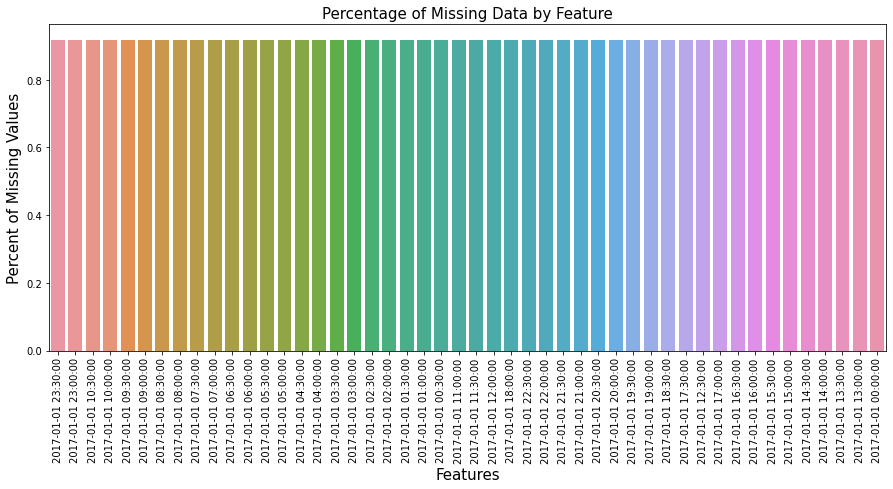

In [26]:
nan_viz(cons.loc[:, '2017-01-01 00:00:00':'2017-01-01 23:30:00'])
# ouka o93od badél mn win l win thb tchouf nanét fi nafs wa9t ...

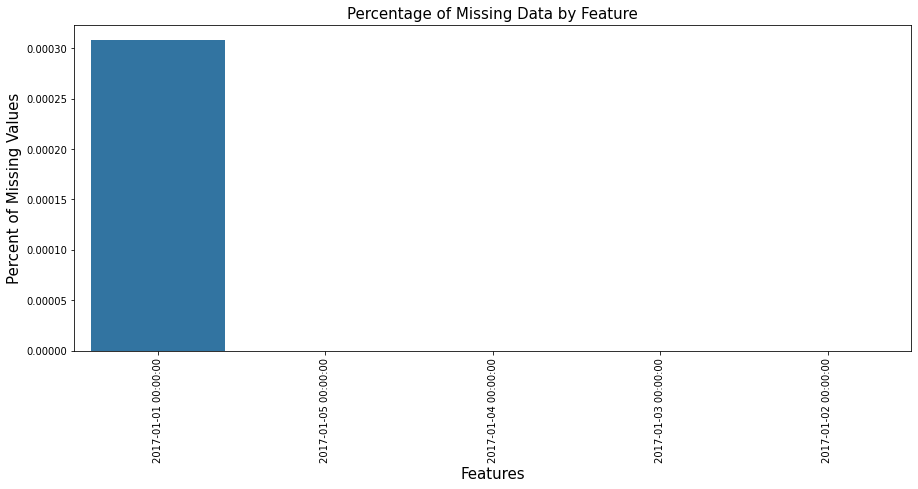

In [27]:
nan_viz(weather_min.loc[:, '2017-01-01 00:00:00':'2017-01-05 00:00:00'])
nan_viz(weather_avg.loc[:, '2017-01-01 00:00:00':'2017-01-05 00:00:00'])
nan_viz(weather_max.loc[:, '2017-01-01 00:00:00':'2017-01-05 00:00:00'])

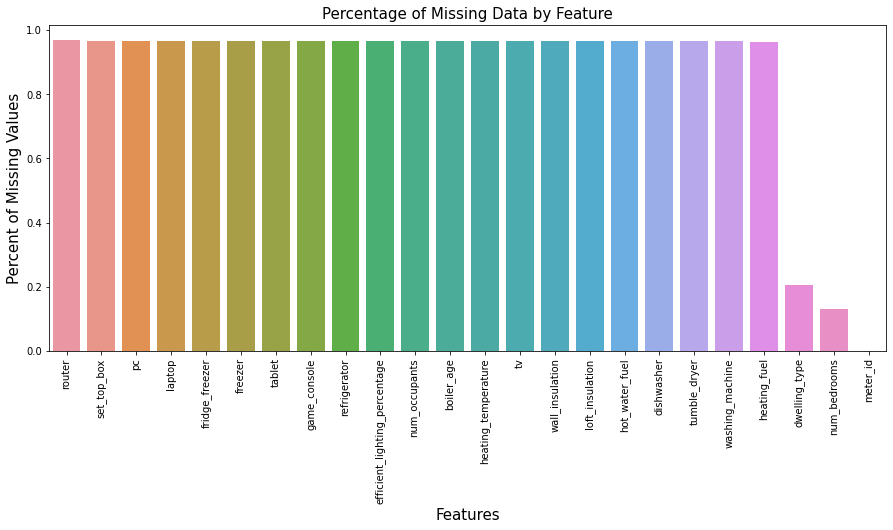

In [31]:
nan_viz(add)

visualization plots

In [93]:
df = random_sampling(prepare_compteur(cons,3001),'consommation')
df = time_features(df)
casting(df)
mapping(df)
encoding(df)

100%|██████████| 17520/17520 [00:25<00:00, 688.69it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [98]:
Features =  ['minute','day','day_string','dayofyear','month','season']
for x in Features : 
  aggregated_plot(df,'hour',x,'median','Median Hourly Power Demand per ' + x ) 

Weather_clustering

In [125]:
weather_min_feat(weather_avg,df)
weather_avg_feat(weather_avg,df)
weather_max_feat(weather_avg,df)

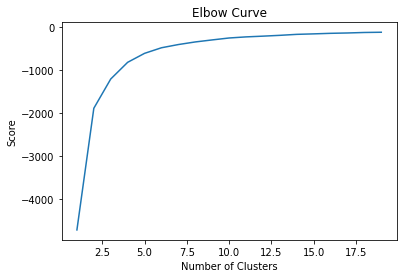

In [131]:
Elbow_curve(df)